In [2]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
from sqlalchemy import create_engine, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
inspector = inspect(engine)

In [14]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
engine.execute('SELECT * FROM measurement LIMIT 20').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

In [16]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [18]:
session.query(func.count(Measurement.date)).all()



[(19550)]

In [19]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [20]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [21]:
import datetime as dt

In [22]:
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [23]:
results = session.query(Measurement.date, Measurement.station, Measurement.prcp, Measurement.id, Measurement.tobs)\
.filter(Measurement.date >= query_date).all()
results

[('2016-08-23', 'USC00519397', 0.0, 2364, 81.0),
 ('2016-08-24', 'USC00519397', 0.08, 2365, 79.0),
 ('2016-08-25', 'USC00519397', 0.08, 2366, 80.0),
 ('2016-08-26', 'USC00519397', 0.0, 2367, 79.0),
 ('2016-08-27', 'USC00519397', 0.0, 2368, 77.0),
 ('2016-08-28', 'USC00519397', 0.01, 2369, 78.0),
 ('2016-08-29', 'USC00519397', 0.0, 2370, 78.0),
 ('2016-08-30', 'USC00519397', 0.0, 2371, 79.0),
 ('2016-08-31', 'USC00519397', 0.13, 2372, 80.0),
 ('2016-09-01', 'USC00519397', 0.0, 2373, 81.0),
 ('2016-09-02', 'USC00519397', 0.0, 2374, 80.0),
 ('2016-09-03', 'USC00519397', 0.0, 2375, 79.0),
 ('2016-09-04', 'USC00519397', 0.03, 2376, 75.0),
 ('2016-09-05', 'USC00519397', None, 2377, 79.0),
 ('2016-09-06', 'USC00519397', None, 2378, 76.0),
 ('2016-09-07', 'USC00519397', 0.05, 2379, 76.0),
 ('2016-09-08', 'USC00519397', 0.0, 2380, 80.0),
 ('2016-09-09', 'USC00519397', 0.03, 2381, 79.0),
 ('2016-09-10', 'USC00519397', 0.0, 2382, 78.0),
 ('2016-09-11', 'USC00519397', 0.05, 2383, 76.0),
 ('2016-09

In [24]:
prcps = []
for result in results:
    prcps_dict={}
    prcps_dict["date"]=result.date
    prcps_dict["prcp"]=result.prcp
    prcps_dict["station"]=result.station
    prcps_dict["id"]=result.id
    prcps_dict["tobs"]=result.tobs
    prcps.append(prcps_dict)

In [25]:
df = pd.DataFrame(prcps)
df

,date,id,prcp,station,tobs
0,2016-08-23,2364,0.00,USC00519397,81.0
1,2016-08-24,2365,0.08,USC00519397,79.0
2,2016-08-25,2366,0.08,USC00519397,80.0
3,2016-08-26,2367,0.00,USC00519397,79.0
4,2016-08-27,2368,0.00,USC00519397,77.0
5,2016-08-28,2369,0.01,USC00519397,78.0
6,2016-08-29,2370,0.00,USC00519397,78.0
7,2016-08-30,2371,0.00,USC00519397,79.0
8,2016-08-31,2372,0.13,USC00519397,80.0
9,2016-09-01,2373,0.00,USC00519397,81.0


In [26]:
df.set_index(df["date"],inplace=True)
df

,date,id,prcp,station,tobs
date,,,,,
2016-08-23,2016-08-23,2364,0.00,USC00519397,81.0
2016-08-24,2016-08-24,2365,0.08,USC00519397,79.0
2016-08-25,2016-08-25,2366,0.08,USC00519397,80.0
2016-08-26,2016-08-26,2367,0.00,USC00519397,79.0
2016-08-27,2016-08-27,2368,0.00,USC00519397,77.0
2016-08-28,2016-08-28,2369,0.01,USC00519397,78.0
2016-08-29,2016-08-29,2370,0.00,USC00519397,78.0
2016-08-30,2016-08-30,2371,0.00,USC00519397,79.0
2016-08-31,2016-08-31,2372,0.13,USC00519397,80.0


In [27]:
df_filter = df[df.station == 'USC00519397']
df_filter


,date,id,prcp,station,tobs
date,,,,,
2016-08-23,2016-08-23,2364,0.00,USC00519397,81.0
2016-08-24,2016-08-24,2365,0.08,USC00519397,79.0
2016-08-25,2016-08-25,2366,0.08,USC00519397,80.0
2016-08-26,2016-08-26,2367,0.00,USC00519397,79.0
2016-08-27,2016-08-27,2368,0.00,USC00519397,77.0
2016-08-28,2016-08-28,2369,0.01,USC00519397,78.0
2016-08-29,2016-08-29,2370,0.00,USC00519397,78.0
2016-08-30,2016-08-30,2371,0.00,USC00519397,79.0
2016-08-31,2016-08-31,2372,0.13,USC00519397,80.0


In [31]:
clean_df = df_filter.sort_values("date",ascending=False)
clean_df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,date,id,prcp,station,tobs
date,,,,,
2017-08-23,2017-08-23,2724,0.00,USC00519397,81.0
2017-08-22,2017-08-22,2723,0.00,USC00519397,82.0
2017-08-21,2017-08-21,2722,0.00,USC00519397,81.0
2017-08-20,2017-08-20,2721,0.00,USC00519397,81.0
2017-08-19,2017-08-19,2720,0.00,USC00519397,79.0
2017-08-18,2017-08-18,2719,0.00,USC00519397,80.0
2017-08-15,2017-08-15,2718,0.02,USC00519397,78.0
2017-08-14,2017-08-14,2717,0.00,USC00519397,79.0
2017-08-13,2017-08-13,2716,0.00,USC00519397,81.0


<IPython.core.display.Javascript object>


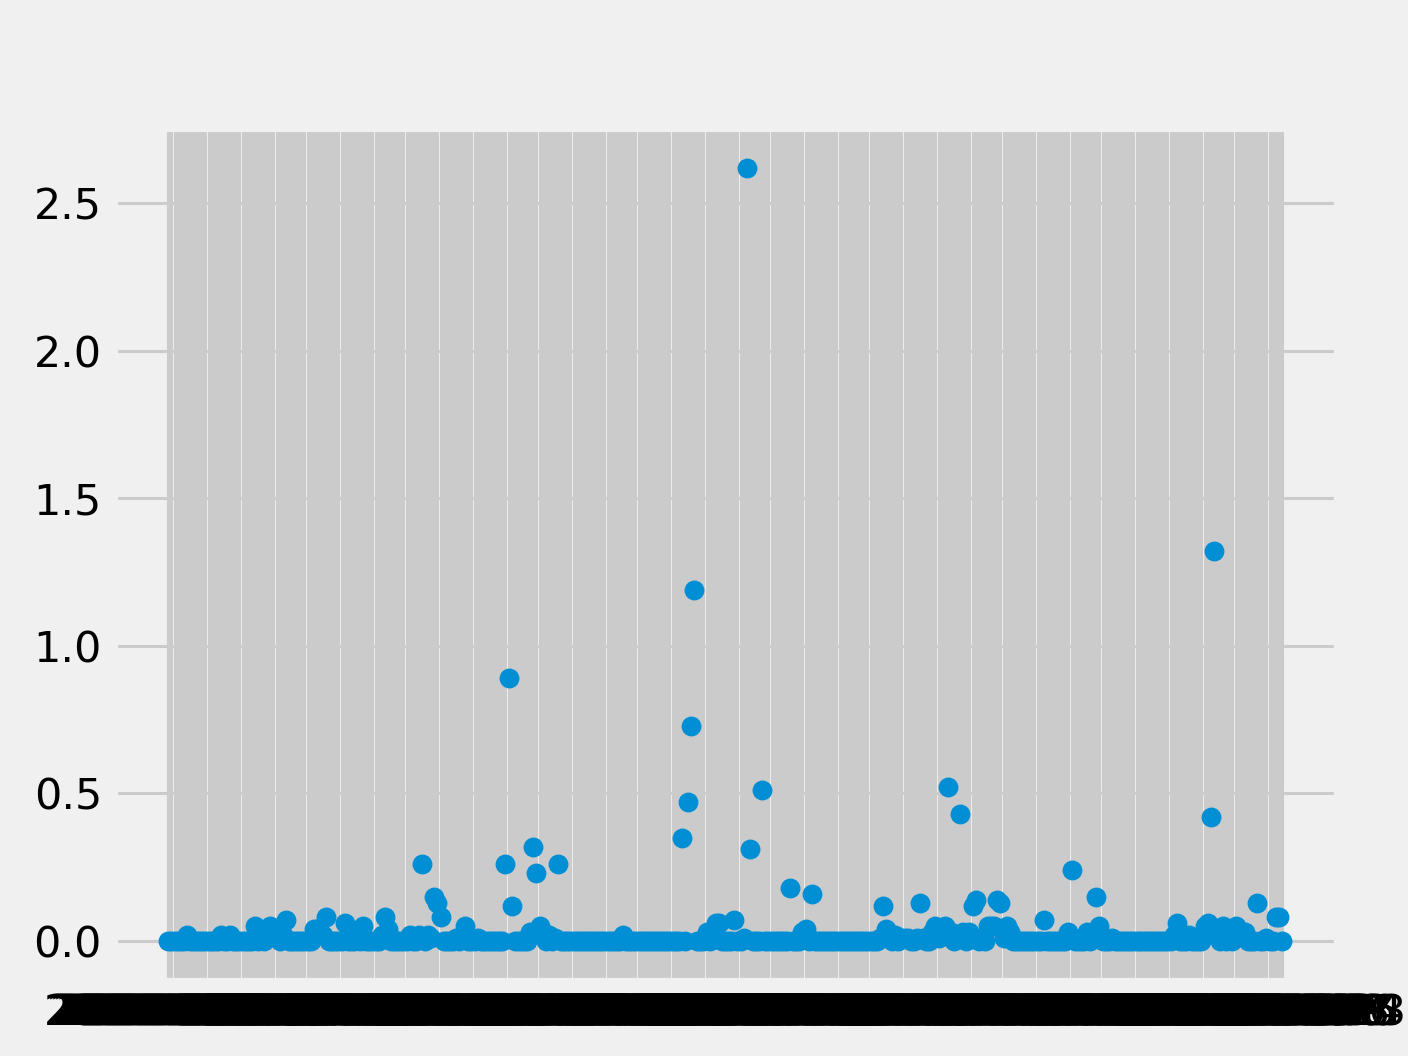

In [32]:
plt.scatter(clean_df["date"], clean_df["prcp"])
plt.show()

# Exploratory Climate Analysis

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df["prcp"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [35]:
results_stations = session.query(Station.id, Station.station, Station.name,Station.latitude,Station.longitude,Station.elevation).all()
results_stations

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (7,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (8,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [36]:
all_stations = []
for station in results_stations:
        station_dict = {}
        station_dict["id"] = station.id
        station_dict["station"] = station.station
        station_dict["name"] = station.name
        station_dict["latitude"]= station.latitude
        station_dict["longitude"]=station.longitude
        station_dict["elevation"]=station.elevation
        all_stations.append(station_dict)

In [37]:
df2 = pd.DataFrame(all_stations)
df2

,elevation,id,latitude,longitude,name,station
0,3.0,1,21.27160,-157.81680,"WAIKIKI 717.2, HI US",USC00519397
1,14.6,2,21.42340,-157.80150,"KANEOHE 838.1, HI US",USC00513117
2,7.0,3,21.52130,-157.83740,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830
3,11.9,4,21.39340,-157.97510,"PEARL CITY, HI US",USC00517948
4,306.6,5,21.49920,-158.01110,"UPPER WAHIAWA 874.3, HI US",USC00518838
5,19.5,6,21.33556,-157.71139,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523
6,32.9,7,21.45167,-157.84889,"WAIHEE 837.5, HI US",USC00519281
7,0.9,8,21.31520,-157.99920,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918
8,152.4,9,21.33310,-157.80250,"MANOA LYON ARBO 785.2, HI US",USC00516128


In [38]:
# How many stations are available in this dataset?
df2["station"].nunique()

9

In [39]:
results = session.query(Measurement.date, Measurement.station, Measurement.id, Measurement.tobs)\
.filter(Measurement.date >= query_date).all()
results

[('2016-08-23', 'USC00519397', 2364, 81.0),
 ('2016-08-24', 'USC00519397', 2365, 79.0),
 ('2016-08-25', 'USC00519397', 2366, 80.0),
 ('2016-08-26', 'USC00519397', 2367, 79.0),
 ('2016-08-27', 'USC00519397', 2368, 77.0),
 ('2016-08-28', 'USC00519397', 2369, 78.0),
 ('2016-08-29', 'USC00519397', 2370, 78.0),
 ('2016-08-30', 'USC00519397', 2371, 79.0),
 ('2016-08-31', 'USC00519397', 2372, 80.0),
 ('2016-09-01', 'USC00519397', 2373, 81.0),
 ('2016-09-02', 'USC00519397', 2374, 80.0),
 ('2016-09-03', 'USC00519397', 2375, 79.0),
 ('2016-09-04', 'USC00519397', 2376, 75.0),
 ('2016-09-05', 'USC00519397', 2377, 79.0),
 ('2016-09-06', 'USC00519397', 2378, 76.0),
 ('2016-09-07', 'USC00519397', 2379, 76.0),
 ('2016-09-08', 'USC00519397', 2380, 80.0),
 ('2016-09-09', 'USC00519397', 2381, 79.0),
 ('2016-09-10', 'USC00519397', 2382, 78.0),
 ('2016-09-11', 'USC00519397', 2383, 76.0),
 ('2016-09-12', 'USC00519397', 2384, 78.0),
 ('2016-09-13', 'USC00519397', 2385, 78.0),
 ('2016-09-14', 'USC00519397', 2

In [40]:
# What are the most active stations?
# List the stations and the counts in descending order.
df_group = df.groupby("station")
df_group["id"].count().sort_values(ascending=False)

station
USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: id, dtype: int64

In [41]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
.filter(Measurement.station == "USC00519397").all()
print(active)


[(56.0, 87.0, 74.55323054331865)]


In [42]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(Measurement.tobs, func.count(Measurement.tobs))\
.filter(Measurement.date >= query_date).filter(Measurement.station == "USC00519397").group_by(Measurement.tobs).all()
tobs

[(60.0, 1),
 (61.0, 2),
 (62.0, 4),
 (63.0, 4),
 (64.0, 5),
 (65.0, 4),
 (66.0, 8),
 (67.0, 7),
 (68.0, 7),
 (69.0, 10),
 (70.0, 9),
 (71.0, 21),
 (72.0, 17),
 (73.0, 13),
 (74.0, 16),
 (75.0, 21),
 (76.0, 24),
 (77.0, 38),
 (78.0, 36),
 (79.0, 41),
 (80.0, 48),
 (81.0, 20),
 (82.0, 3),
 (83.0, 1),
 (87.0, 1)]

,temp,temp_count
0,60.0,1
1,61.0,2
2,62.0,4
3,63.0,4
4,64.0,5
5,65.0,4
6,66.0,8
7,67.0,7
8,68.0,7
9,69.0,10


<IPython.core.display.Javascript object>


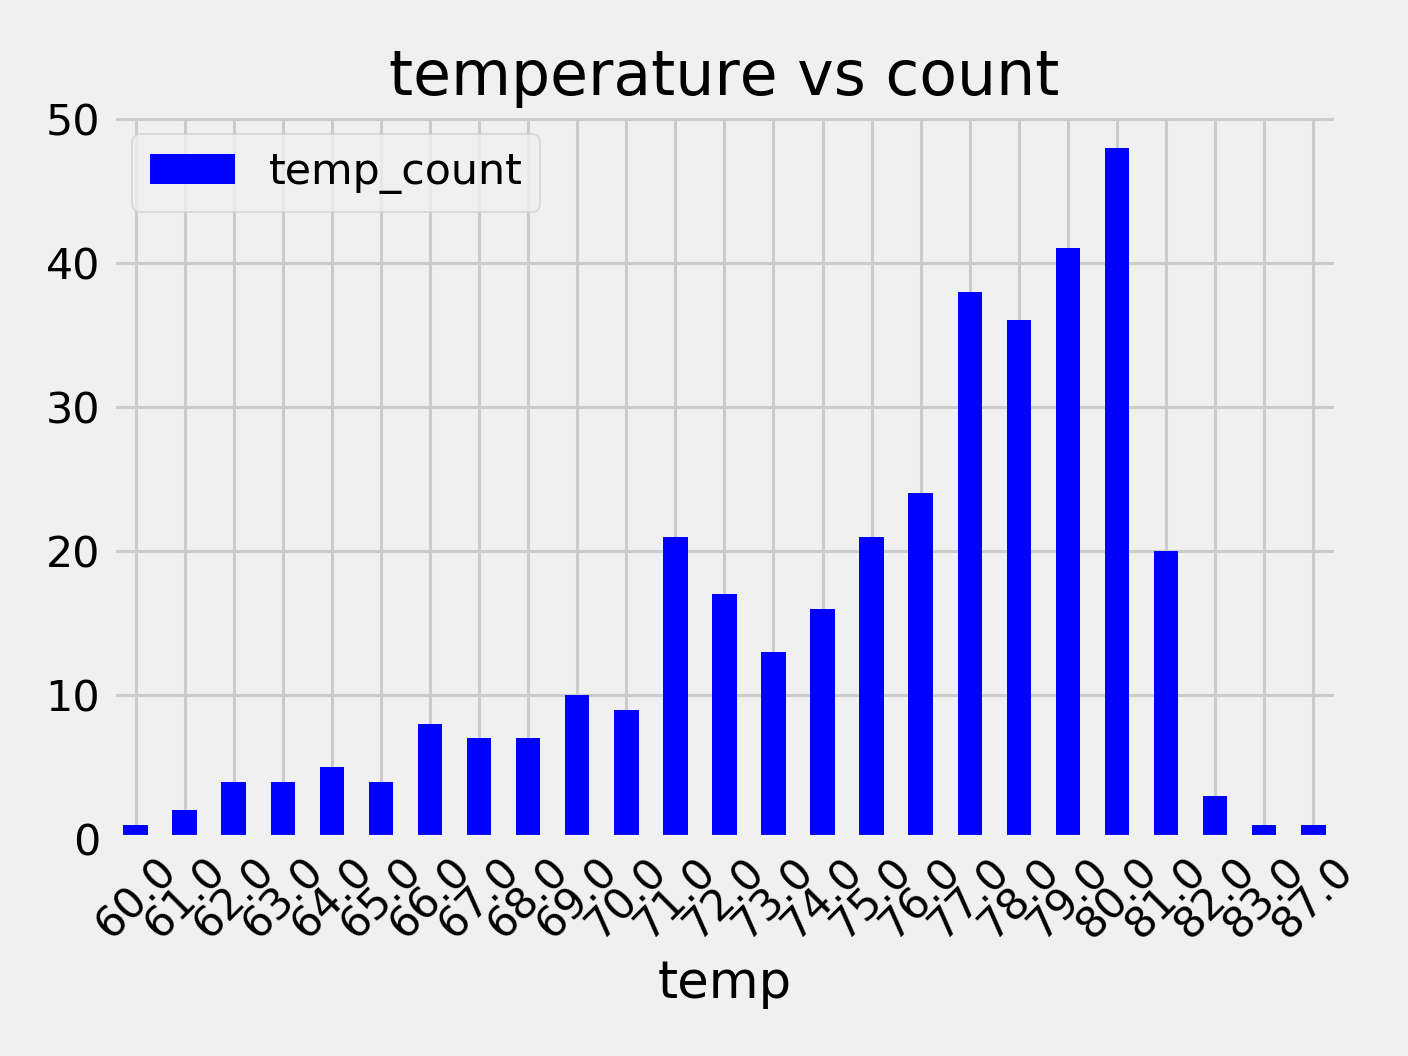

In [57]:
dftemp=pd.DataFrame(tobs, columns=["temp","temp_count"])
dftemp
tempbar= dftemp.plot.bar(x="temp", y="temp_count",title="temperature vs count", color="blue")
plt.xticks(rotation=45)
plt.tight_layout()

In [58]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [67]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip=calc_temps("2017-05-10","2017-05-30")
print(calc_temps("2017-05-10","2017-05-30"))


[(68.0, 75.05084745762711, 87.0)]


<IPython.core.display.Javascript object>


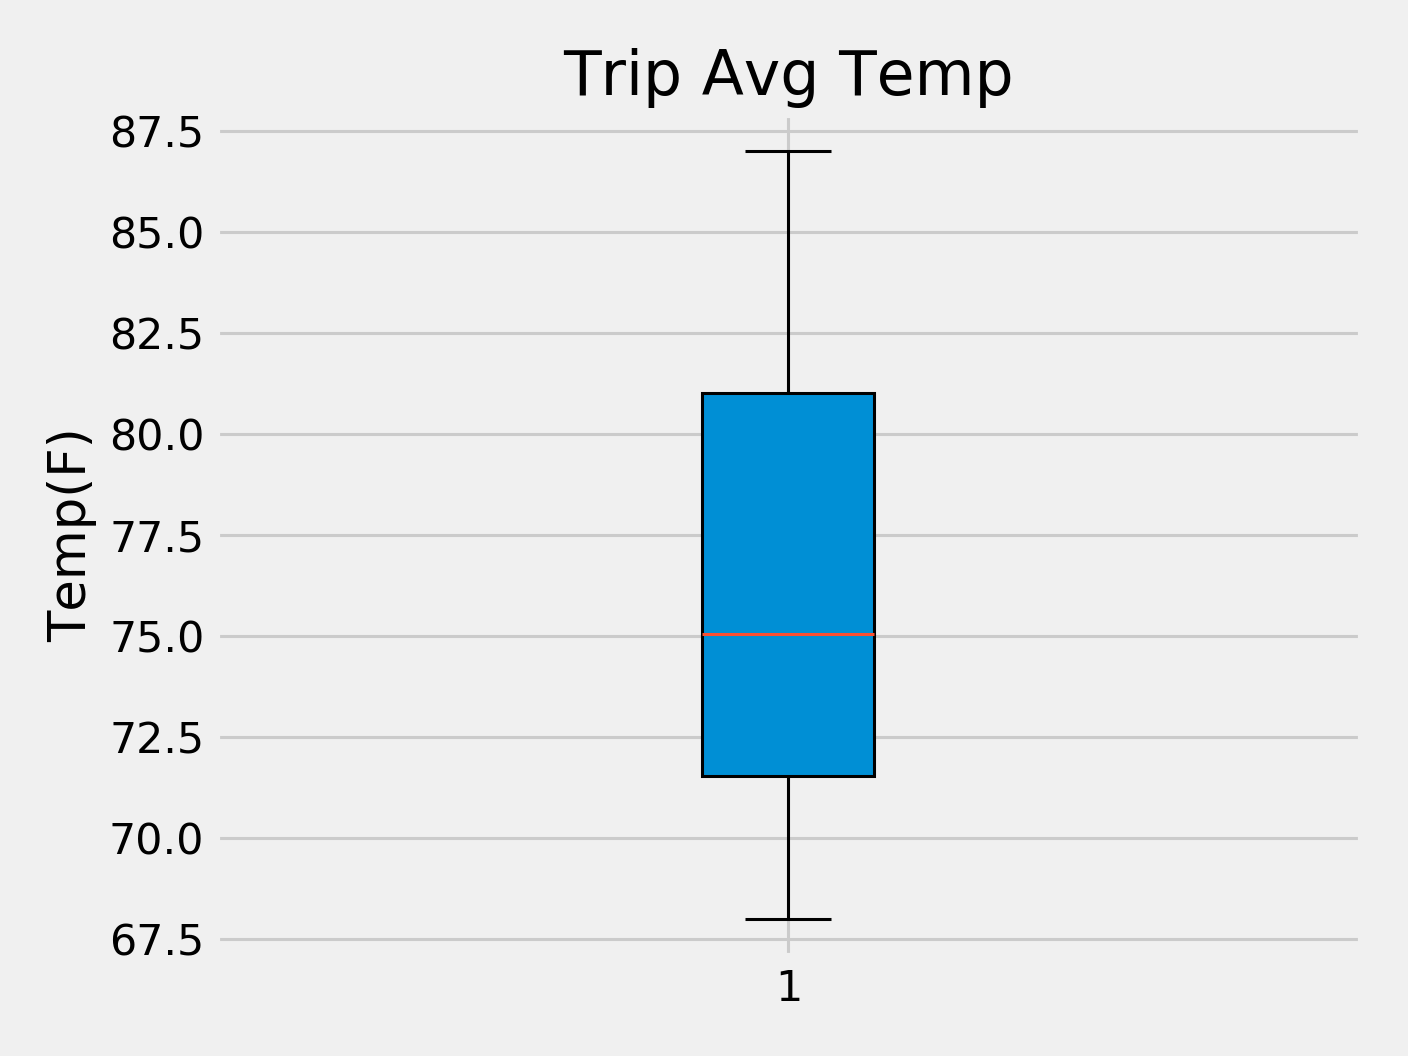

In [68]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
x = range(len(trip))
ax.boxplot(trip, patch_artist=True)
ax.set_title('Trip Avg Temp')
ax.set_ylabel("Temp(F)")
fig.tight_layout()
plt.show()


In [71]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rain=session.query(Measurement.date,Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,Measurement.id,Measurement.tobs,Measurement.prcp).filter(Measurement.date<"2017-05-30")\
.filter(Measurement.date>"2017-05-10").order_by(Measurement.prcp.desc()).all()
rain


[('2017-05-24',
  'USC00516128',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  19464,
  70.0,
  2.17),
 ('2017-05-24',
  'USC00516128',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  19464,
  70.0,
  2.17),
 ('2017-05-24',
  'USC00516128',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  19464,
  70.0,
  2.17),
 ('2017-05-24',
  'USC00516128',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  19464,
  70.0,
  2.17),
 ('2017-05-24',
  'USC00516128',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  19464,
  70.0,
  2.17),
 ('2017-05-24',
  'USC00516128',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  19464,
  70.0,
  2.17),
 ('2017-05-24',
  'USC00516128',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  19464,
  70.0,
  2.17),
 ('2017-05-24',
  'USC00516128',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  19464,
  70.0,
  2.17),
 ('201

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


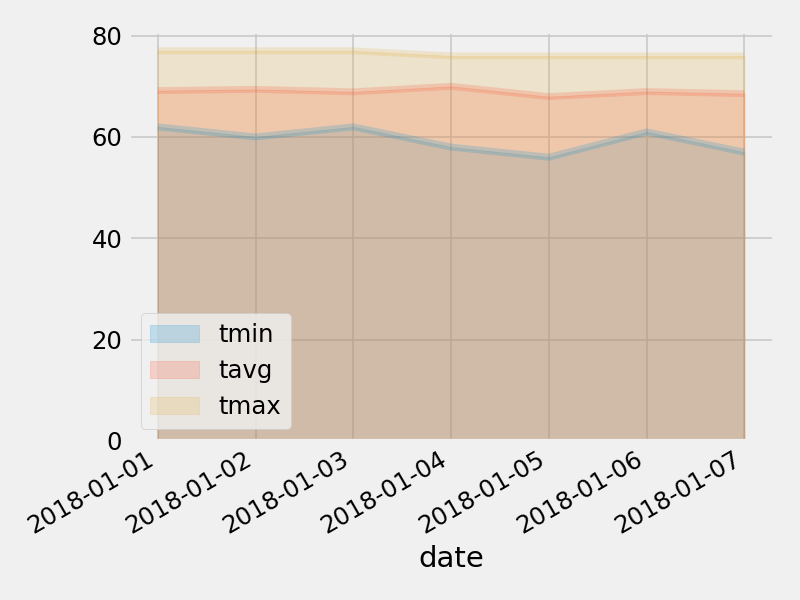

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
